##**Project: Sales Prediction Model for House Sales**

**Project Overview**

**Project Name: House Sales Prediction Model**

Description:

This project aims to predict house prices using a regression model based on historical data. Predicting house prices helps real estate professionals and buyers make informed decisions. Two models, Linear Regression and Random Forest, are used to predict the target variable (house prices) based on several features including house area, number of bedrooms, bathrooms, presence of a guestroom, parking spots, and more.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


##**Dataset Overview:**

The dataset contains 545 rows and 13 columns.
Features include area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, airconditioning, parking, and furnishingstatus.
The target variable is price.


In [2]:
# Load the dataset (use the appropriate path for your Google Colab)
data = pd.read_csv('/content/Housing.csv')

# Display the first few rows of the dataset
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Exploratory Data Analysis (EDA)
Initial Exploration: We start by loading the dataset, understanding the structure, and visualizing relationships between features and the target variable (house price).

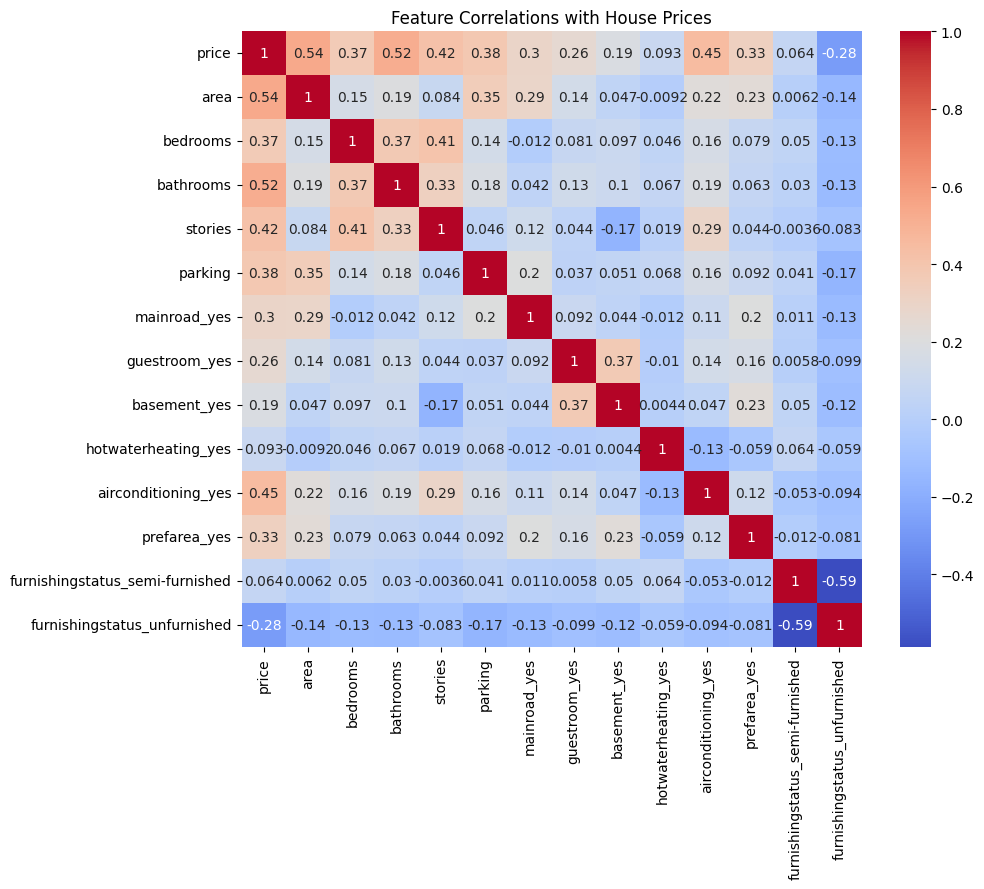

In [14]:
# Visualize feature distribution and correlations
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with House Prices')
plt.show()


#**Observations:**

Some features, such as area, have a high correlation with house prices, making them important predictors.
Categorical variables such as guestroom, mainroad, and airconditioning may also influence the prices.
Handling Missing Values: There were no missing values detected in the dataset, so no imputation was needed.

In [3]:
# Check for missing values
print(data.isnull().sum())




price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


#**Preprocessing**
One-Hot Encoding:
Categorical variables such as furnishingstatus, mainroad, airconditioning, etc., were converted into binary variables using one-hot encoding.

In [5]:
# Convert categorical variables into numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Check the transformed dataset
data_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [7]:
# Check the column names in the dataset
print(data_encoded.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


#feature-Target Splitting:
The target variable price was separated from the other features.

In [9]:
# Update the target column name based on the output from Step 1
target = 'price'  # Replace 'Price' with the correct column name from your dataset

# Features (all columns except the target)
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]


In [10]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - R² Score: {r2_lr}')


Linear Regression - Mean Squared Error: 1754318687330.6638
Linear Regression - R² Score: 0.6529242642153184


In [12]:
# Initialize and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')


Random Forest - Mean Squared Error: 1961585044320.3433
Random Forest - R² Score: 0.611918531405699


#**Visual Comparison:**
We plotted the predictions against the actual house prices to see how well the models fit the data.

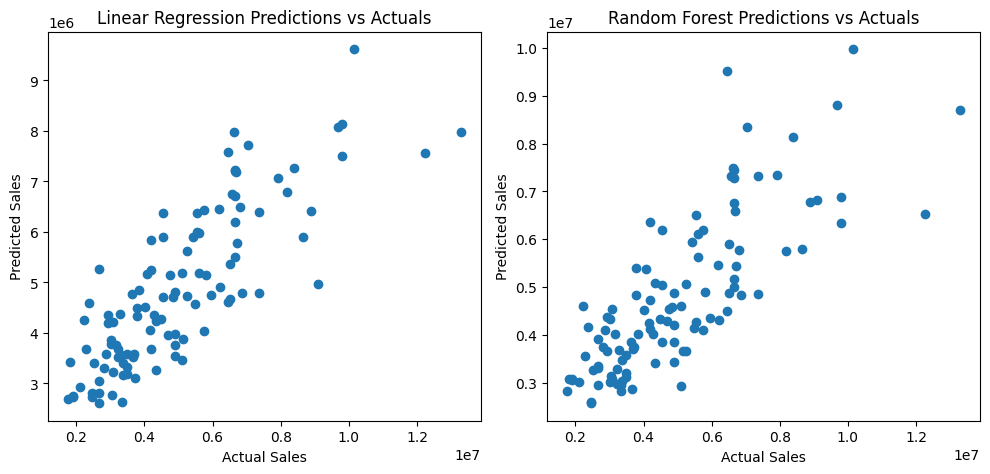

In [13]:
# Plot the results of both models against actual values
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.title('Linear Regression Predictions vs Actuals')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest Predictions vs Actuals')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()


#Conclusion
Linear Regression performed better overall with a higher R² score and lower Mean Squared Error compared to Random Forest.

The models were able to capture the overall trend in house prices based on the available features, though further tuning and feature engineering could improve performance.





